In [1]:
import keras
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import activations
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv('bank-full.csv', sep=';')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
def Norm_Sklearn(df, atr_list):
    df[atr_list] = preprocessing.normalize(np.array(df[atr_list]), axis=0, norm='l2')

In [6]:
def Norm_Gaussian(df, atr_list):
    for atr in atr_list:
        df[atr] = (df[atr] - df[atr].mean()) / df[atr].std()

In [7]:
def Encoder(df, atr_list):
    enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
    df[atr_list] = enc.fit_transform(df[atr_list])

In [8]:
print(dataset.head(10))

   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may     

In [9]:
data = dataset.copy()

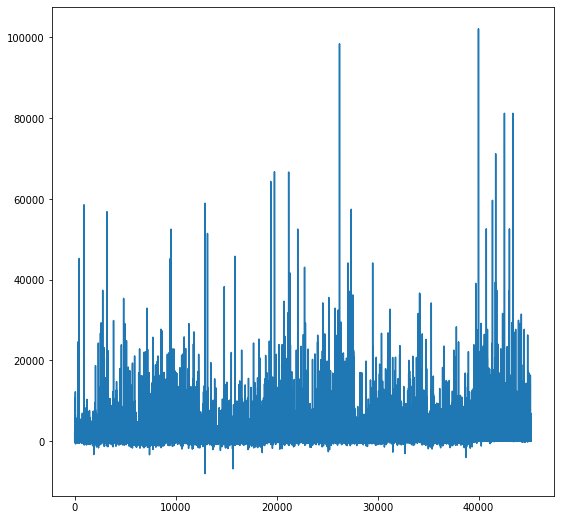

In [10]:
plt.figure(figsize=(9, 9))
data['balance'].plot()
plt.show()

In [11]:
Norm_Sklearn(data, ["age", "day", "balance", "duration", "pdays", "previous", "campaign"])

In [12]:
Encoder(data, ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"])

In [13]:
print(data.head(10))

        age   job  marital  education  default   balance  housing  loan  \
0  0.006450   4.0      1.0        2.0      0.0  0.003022      1.0   0.0   
1  0.004893   9.0      2.0        1.0      0.0  0.000041      1.0   0.0   
2  0.003670   2.0      1.0        1.0      0.0  0.000003      1.0   1.0   
3  0.005227   1.0      1.0        3.0      0.0  0.002123      1.0   0.0   
4  0.003670  11.0      2.0        3.0      0.0  0.000001      0.0   0.0   
5  0.003892   4.0      1.0        2.0      0.0  0.000326      1.0   0.0   
6  0.003114   4.0      2.0        2.0      0.0  0.000630      1.0   1.0   
7  0.004671   2.0      0.0        2.0      1.0  0.000003      1.0   0.0   
8  0.006450   5.0      1.0        0.0      0.0  0.000171      1.0   0.0   
9  0.004782   9.0      2.0        1.0      0.0  0.000836      1.0   0.0   

   contact       day  month  duration  campaign     pdays  previous  poutcome  \
0      2.0  0.001316    8.0  0.003366  0.001133 -0.000044       0.0       3.0   
1      2.0  

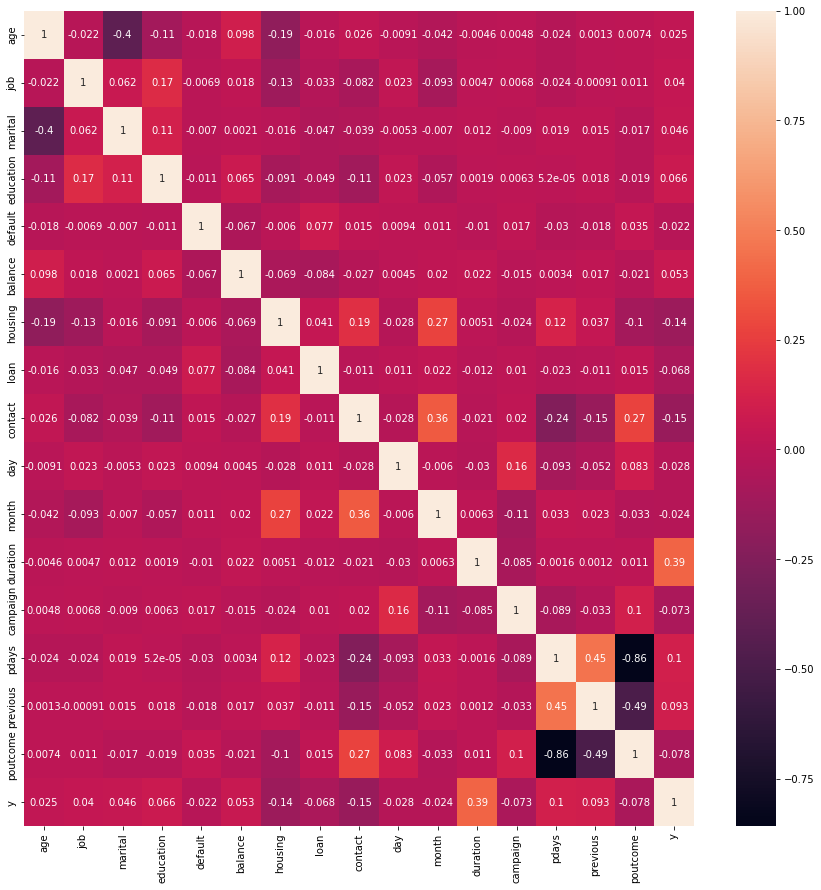

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), cbar=True, annot=True)

plt.show()

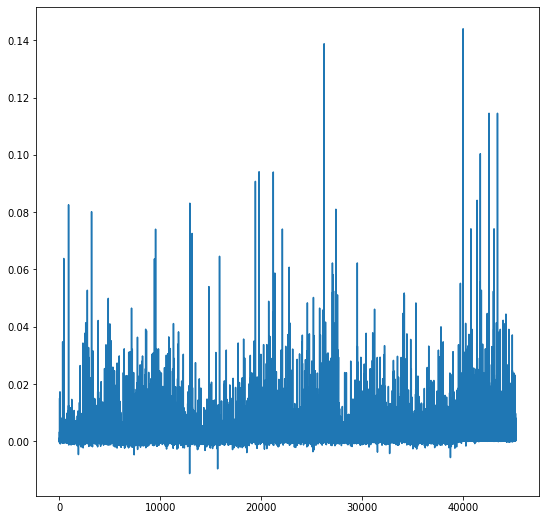

In [15]:
plt.figure(figsize=(9, 9))
(data['balance']).plot()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['y', 'pdays'], axis=1), data['y'], test_size=0.3, random_state=42) #pdays

In [17]:
def make_seq_model(activation_functions, alpha=0.3, num_classes=2, input_shape=16):
    model = Sequential()
    model.add(Dropout(alpha, input_shape=(input_shape,)))
    
    model.add(Dense(256, activation=activation_functions["hidden layer"]))
    model.add(Dropout(alpha))

    model.add(Dense(512, activation=activation_functions["hidden layer"]))
    model.add(Dropout(alpha))
    
    model.add(Dense(512, activation=activation_functions["hidden layer"]))
    if activation_functions["output layer"] == activations.softmax:
        model.add(Dense(num_classes, activation=activation_functions["output layer"]))
    else:
        model.add(Dense(num_classes - 1, activation=activation_functions["output layer"]))
        
    #model.summary()    
    return model

In [18]:
activation_functions = {
  "hidden layer": activations.relu,
  "output layer": activations.sigmoid,
}

In [31]:
model = make_seq_model(activation_functions, input_shape=15, alpha=0.15)
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
opt_sgd = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt_RMS = keras.optimizers.RMSprop(learning_rate=0.001)
bce = keras.losses.BinaryCrossentropy(from_logits=False) #sigmoid = False [0; 1] True [-inf, +inf]
scc = keras.losses.SparseCategoricalCrossentropy(from_logits=False) #softmax
model.compile(optimizer=opt_RMS,
              loss=bce,
             metrics=['accuracy']) # loss

In [33]:
model.fit(X_train, y_train, batch_size=1024, epochs=30, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/30
31/31 [==============================] - 1s 21ms/step - loss: 0.3175 - accuracy: 0.8896 - val_loss: 0.3168 - val_accuracy: 0.8896
Epoch 2/30
31/31 [==============================] - 0s 12ms/step - loss: 0.3208 - accuracy: 0.8880 - val_loss: 0.3295 - val_accuracy: 0.8904
Epoch 3/30
31/31 [==============================] - 0s 12ms/step - loss: 0.3176 - accuracy: 0.8889 - val_loss: 0.3595 - val_accuracy: 0.8837
Epoch 4/30
31/31 [==============================] - 0s 12ms/step - loss: 0.3184 - accuracy: 0.8893 - val_loss: 0.3184 - val_accuracy: 0.8904
Epoch 5/30
31/31 [==============================] - 0s 12ms/step - loss: 0.3161 - accuracy: 0.8897 - val_loss: 0.3114 - val_accuracy: 0.8917
Epoch 6/30
31/31 [==============================] - 0s 13ms/step - loss: 0.3168 - accuracy: 0.8891 - val_loss: 0.3168 - val_accuracy: 0.8916
Epoch 7/30
31/31 [==============================] - 0s 13ms/step - loss: 0.3153 - accuracy: 0.8902 - val_loss: 0.3073 - val_accuracy: 0.8918
Epoch 8/30
31

In [21]:
model.save('my_model.h5')
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.3492594063282013
Test accuracy 0.8821881413459778


In [22]:
model1 = make_seq_model(activation_functions, input_shape=15, alpha=0.15)
df = data.sample(frac = 1)
inputs = np.array(df.drop(['y', 'pdays'], axis=1))
targets = np.array(df['y'])

In [23]:
kfold = KFold(n_splits=10, shuffle=False)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(inputs, targets):
    model = keras.models.clone_model(model1)
    opt = keras.optimizers.Adam(learning_rate=0.001)
    bce = keras.losses.BinaryCrossentropy(from_logits=False) #sigmoid = False [0; 1] True [-inf, +inf]
    scc = keras.losses.SparseCategoricalCrossentropy(from_logits=False) #softmax
    model.compile(optimizer=opt,
                  loss=bce,
                  metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=1024, epochs=20, verbose=0)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3280596137046814; accuracy of 89.05351758003235%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.30887171626091003; accuracy of 89.09533023834229%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3131323754787445; accuracy of 89.13956880569458%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.31120848655700684; accuracy of 89.51559662818909%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.30961447954177856; accuracy of 88.89626264572144%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.32

In [24]:
acc_per_fold

[89.05351758003235,
 89.09533023834229,
 89.13956880569458,
 89.51559662818909,
 88.89626264572144,
 88.01150321960449,
 88.87414336204529,
 88.91838192939758,
 89.53770995140076,
 89.4271194934845]

In [25]:
print(np.array(acc_per_fold).mean(), " - mean")
print(np.array(acc_per_fold).std(), " - std")

89.04691338539124  - mean
0.4191914172296709  - std
